# PCA&Cluster

- Author: Wen Xin
- Description: This file means that I use pca and clusters to generate new features for our model. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [5]:
train=pd.read_csv('train.csv')

In [6]:
columns=list(train.columns)

In [7]:
columns.remove('label')

In [8]:
train.shape

(153484, 123)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [35]:
train_scaled=scaler.fit_transform(train[columns])

In [36]:
import sklearn.decomposition as skd

In [37]:
pca = skd.PCA()

In [38]:
train_pcad = pca.fit_transform(train_scaled)

In [39]:
import matplotlib.pyplot as plt

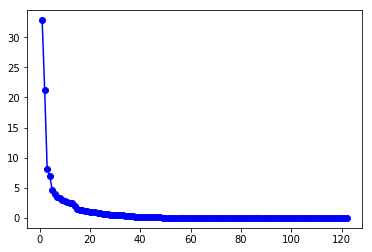

In [41]:
plt.plot(range(1,123),pca.explained_variance_,'b-o')

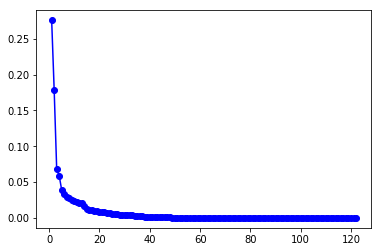

In [42]:
plt.plot(range(1,123),pca.explained_variance_ratio_,'b-o')

In [43]:
pca_components=pd.DataFrame(train_pcad)[[0,1,2,3,4]]

In [44]:
pca_components.columns=['pca_1','pca_2','pca_3','pca_4','pca_5']

In [45]:
pca_columns=['pca_1','pca_2','pca_3','pca_4','pca_5']

In [46]:
pca_components.corr()

,pca_1,pca_2,pca_3,pca_4,pca_5
pca_1,1.000000e+00,1.640448e-15,-6.168308e-16,-1.813296e-15,-4.432454e-16
pca_2,1.640448e-15,1.000000e+00,-4.200290e-16,7.946634e-17,5.087783e-19
pca_3,-6.168308e-16,-4.200290e-16,1.000000e+00,1.505063e-16,-1.700886e-16
pca_4,-1.813296e-15,7.946634e-17,1.505063e-16,1.000000e+00,6.832165e-16
pca_5,-4.432454e-16,5.087783e-19,-1.700886e-16,6.832165e-16,1.000000e+00


In [47]:
for c in pca_columns:
    train[c]=pca_components[c]

In [48]:
from sklearn import metrics
from sklearn.cluster import KMeans

# Insert your code here
elbows=[]
sihouttes=[]
for i in range(2,10):
    print(i)
    k_means = KMeans(init='k-means++', n_clusters=i, n_init=10)
    k_means.fit(train_scaled)
    elbows.append(k_means.inertia_)
    sihouttes.append(metrics.silhouette_score(train_scaled,k_means.labels_))
    
elbows_frame = pd.DataFrame(elbows,index=[i for i in range(2,10)],columns=['eblow'])
sihouttes_frame = pd.DataFrame(sihouttes,index=[i for i in range(2,10)],columns=['sihoutte'])

2
3
4
5
6
7
8
9


In [49]:
import seaborn as sns

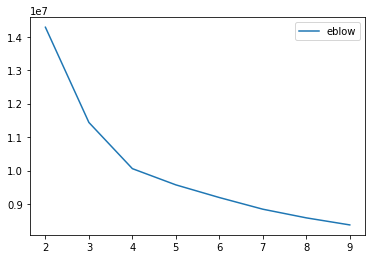

In [50]:
#eblow
fig=sns.lineplot(data=(elbows_frame))

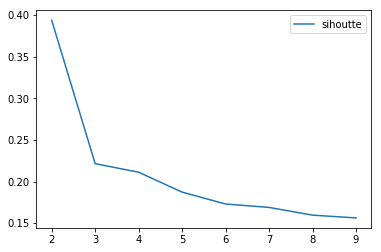

In [51]:
#sihoutte
fig=sns.lineplot(data=(sihouttes_frame))

In [55]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10)
k_means.fit(train_scaled)
k_means.labels_

array([0, 0, 3, ..., 3, 3, 0], dtype=int32)

In [56]:
train['cluster']=np.array(k_means.labels_)

In [57]:
list(train.columns)

['order_sd',
 'active_days',
 'lastgap',
 'avg_gap',
 'min_gap',
 'max_gap',
 'w1_total_orders',
 'w2_total_orders',
 'w3_total_orders',
 'w4_total_orders',
 'w5_total_orders',
 'w6_total_orders',
 'w7_total_orders',
 'label',
 'first_order',
 'last_order',
 'accountLength',
 'overall_time_mean',
 'update2create_time_mean',
 'send2update_time_mean',
 'overall_time_min',
 'update2create_time_min',
 'send2update_time_min',
 'overall_time_max',
 'update2create_time_max',
 'send2update_time_max',
 'intime_rate',
 'last_coupon_fee',
 'last_send_type',
 'order_nums',
 'city_id',
 'sex',
 'age',
 'login_platform_b',
 'app_version_b',
 'age_na',
 'lastgap_na',
 'avg_gap_na',
 'min_gap_na',
 'max_gap_na',
 'overall_time_mean_na',
 'update2create_time_mean_na',
 'send2update_time_mean_na',
 'overall_time_min_na',
 'update2create_time_min_na',
 'send2update_time_min_na',
 'overall_time_max_na',
 'update2create_time_max_na',
 'send2update_time_max_na',
 'w1_avg_couponworth',
 'w2_avg_couponworth',

In [5]:
test=pd.read_csv('test.csv')

In [6]:
len(test)

38371

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
test_scaled=scaler.fit_transform(test[columns])

In [63]:
test_pcad = pca.transform(test_scaled)

In [64]:
pca_components=pd.DataFrame(test_pcad)[[0,1,2,3,4]]

In [65]:
pca_components.columns=['pca_1','pca_2','pca_3','pca_4','pca_5']

In [66]:
for c in pca_columns:
    test[c]=pca_components[c]

In [68]:
test['cluster']=k_means.predict(test_scaled)

In [69]:
train.to_csv("train_transfer.csv",index=False)

In [70]:
test.to_csv("test_transfer.csv",index=False)